# Chapter 4: Demo Build CNN

In [1]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4

/content/drive/My Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4


In [ ]:
# Initialising the CNN
classifier =Sequential()

In [ ]:
# Step1-Convolution
classifier.add(Conv2D(filters=32,kernel_size=3,input_shape=(64,64,3),activation='relu'))

# Step2-Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Part2: Read and pre-process images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('dataset2/training_set',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset2/test_set',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')



Found 8011 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss',patience=5),ModelCheckpoint('model_checkpoint_18052022.h5',save_best_only=True)]

In [ ]:
from datetime import datetime
print(datetime.datetime.now())

AttributeError: ignored

In [ ]:
history = classifier.fit(training_set,
                       epochs=100,
                       validation_data=test_set,
                       callbacks = callbacks)

Epoch 1/100
251/251 [==============================] - 3194s 13s/step - loss: 0.6624 - accuracy: 0.5839 - val_loss: 0.5907 - val_accuracy: 0.6960
Epoch 2/100
251/251 [==============================] - 73s 291ms/step - loss: 0.5857 - accuracy: 0.6901 - val_loss: 0.5442 - val_accuracy: 0.7280
Epoch 3/100
251/251 [==============================] - 72s 285ms/step - loss: 0.5411 - accuracy: 0.7258 - val_loss: 0.5864 - val_accuracy: 0.6925
Epoch 4/100
251/251 [==============================] - 73s 290ms/step - loss: 0.5128 - accuracy: 0.7463 - val_loss: 0.5071 - val_accuracy: 0.7500
Epoch 5/100
251/251 [==============================] - 72s 287ms/step - loss: 0.4929 - accuracy: 0.7571 - val_loss: 0.4977 - val_accuracy: 0.7600
Epoch 6/100
251/251 [==============================] - 73s 290ms/step - loss: 0.4755 - accuracy: 0.7698 - val_loss: 0.4864 - val_accuracy: 0.7740
Epoch 7/100
251/251 [==============================] - 72s 287ms/step - loss: 0.4587 - accuracy: 0.7778 - val_loss: 0.5093 -

In [ ]:
print(datetime.datetime.now())print(datetime.datetime.now())

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)

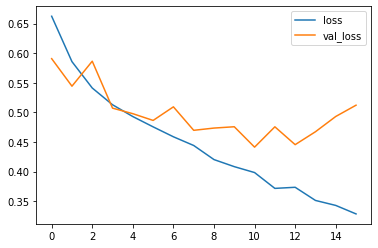

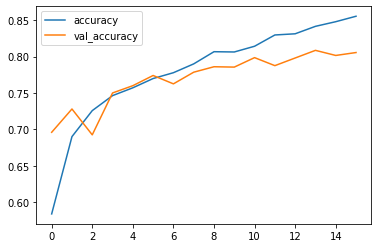

In [ ]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image


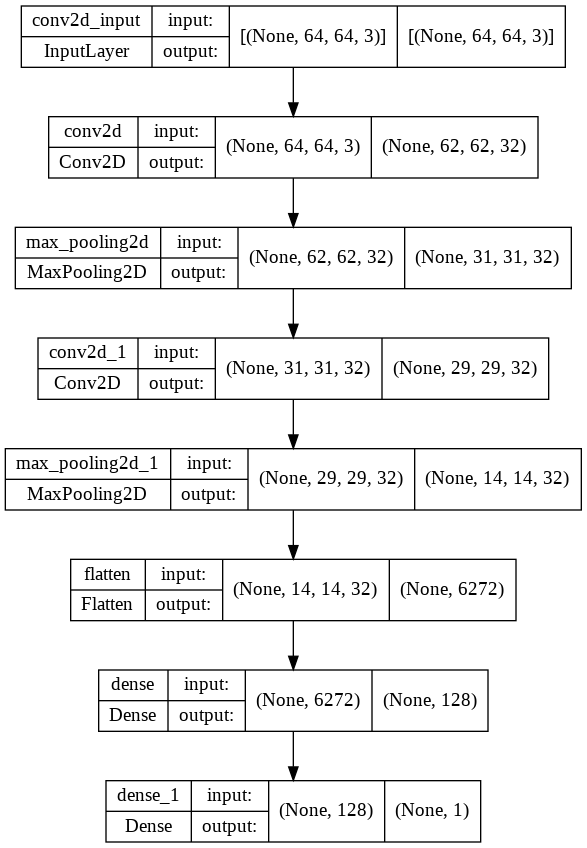

In [ ]:
plot_model(classifier, to_file='CNN_model_20082021.png', show_shapes=True)
Image(filename='CNN_model_20082021.png')

In [ ]:
# save model
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model_CNN_new.h5'
classifier.save('my_model_CNN_18052022.h5')
print("save!!!")

save!!!
